Ngoc Bao Khanh Hoang

Michelle Cong

### **1. Frame the problem**:

The dataset contains cases from a study that was conducted between 1958 and 1970 on the survival of patients who had undergone surgery for breast cancer. Our objective is to develop a machine learning model using the the data where the dependent variable is survival_status. We have to fit a model to predict the patient’s survival status whether the patient survived 5 years or longer or the patient died within 5 years.

### **2. Get the data**

#### *2.1 and 2.2: Create workspace and download data*

We will first load the data and see the first 5 rows


In [2]:
import pandas as pd
df = pd.read_csv("D:\Survival ML\Survival-ML\data.csv", header = None)
df.head()

,0,1,2,3
0,30.0,64.0,1.0,1
1,30.0,62.0,3.0,1
2,30.0,65.0,0.0,1
3,31.0,59.0,2.0,1
4,31.0,65.0,4.0,1


In [3]:
df.columns = ['age','year','pos_ax_nodes','survival_status']
df.head()

,age,year,pos_ax_nodes,survival_status
0,30.0,64.0,1.0,1
1,30.0,62.0,3.0,1
2,30.0,65.0,0.0,1
3,31.0,59.0,2.0,1
4,31.0,65.0,4.0,1


the data contains 4 variables
age, year, pos_ax_nodes, survival_status

#### *2.3: Take a quick look at the data structure:*

Look at the data set information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              304 non-null    float64
 1   year             305 non-null    float64
 2   pos_ax_nodes     304 non-null    float64
 3   survival_status  306 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB





Total number of instances (rows): 306 (small dataset)

There are 4 columns as well as 4 variables: age, year ,pos_as_nodes, survival_status
+ age attributes: has 304 instances (observations) (2 missing values)
+ year: has 305 instances (1 missing values)
+ pos_ax_nodes: has 304 instances (2 missing values)
+ survival_status: 306 instances (non_null values)

The data types are either float64 (age, year, pos_ax_nodes) or int64 (survival_status)



In [5]:
df['survival_status'].value_counts()

survival_status
1    225
2     81
Name: count, dtype: int64

there are 225 instances where survival_status is 1
and 81 instances where survival_status is 2

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'pos_ax_nodes'}>,
        <Axes: title={'center': 'survival_status'}>]], dtype=object)

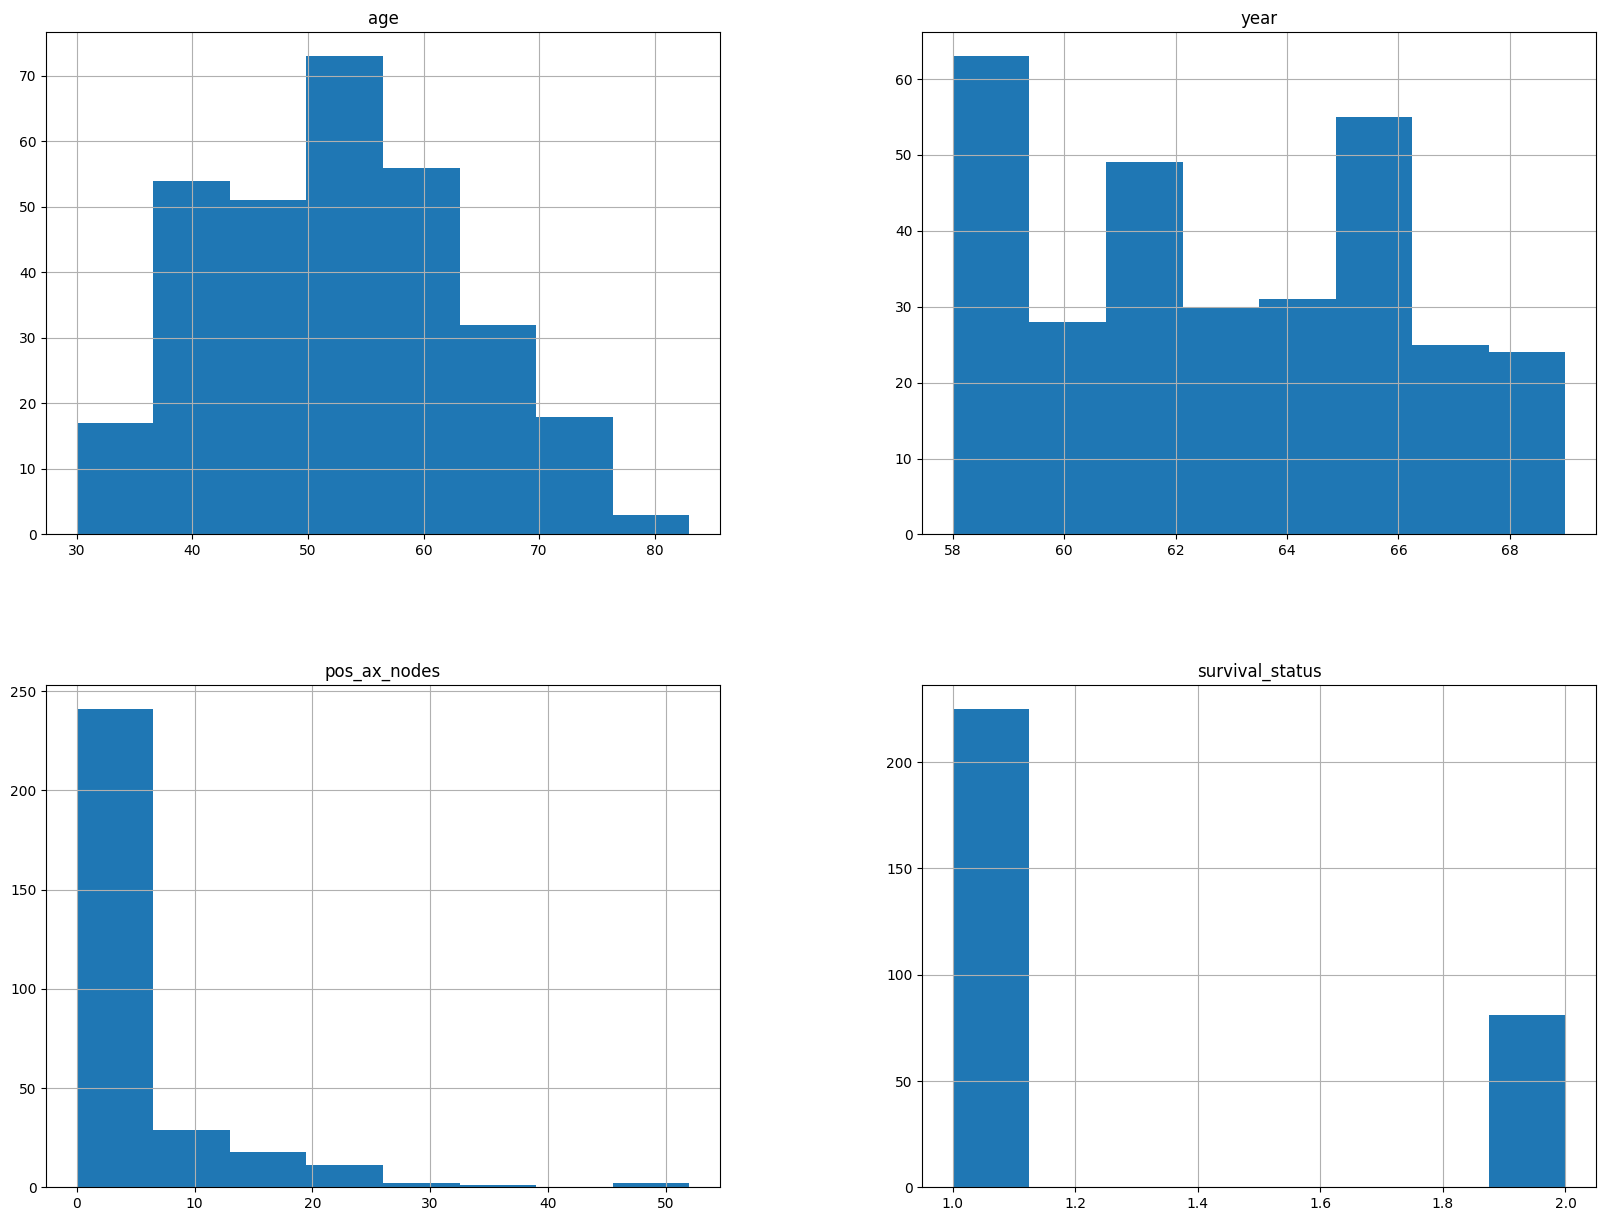

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=8, figsize=(20,15))

1. The age plot: the x_axis represents the patient age ranged from 30 to 80s years old, y_axis is the number of patients ranged from 0 to 70s. From the plot we found there are more patients from the age range of 30s to 60s
2. the year plot: the x_axis represents the year ranged from 1958 to 1969, y_axis is the number of patients ranged from 0 to 60s. From the plot we found there are more patients from the year ranges of 1958 to 1959, 1961 to 1962 and
3. the pos_ax_nodes plot: the x_axis represents the number of positive axillary nodes detected ranged from 0 to 50s, y_axis is the age of patients ranged from 0 to 250. From the plot we found there are most patients from the range of 0 to 7 positive axillary.
4. the survival_status plot: the x_axis represents the number survival status 1 = the patient survived 5 years or longer and 2 = the patient died within 5 years, y_axis is the numeber of patients ranged from 0 to 200s. From the plot we found there are most patients survived more than 5 years.

In [7]:
df.describe()

,age,year,pos_ax_nodes,survival_status
count,304.000000,305.000000,304.000000,306.000000
mean,52.559211,62.842623,4.046053,1.264706
std,10.764343,3.249720,7.208666,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,65.000000,4.250000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The summary statistic from the data df:
- count: dataset contains 304 rows (instances) for age and pos_ax_nodes (2 missing values for each attributes), 305 rows for year (1 missing value) and 306 instances for survival_status (no missing value). there are some missing values but in generally it's mostly complete dataset.
- The variables range of age: from 30 to 83, of year from 1958 to 1969, pos_ox_nodes: from 0 to 52 and survival_status: from 1 to 2
- mean: average of age: 52, year: 62, pos_ax_node: 4 and survival_status: 1
- std: standard deviation measures how dispersed the values units are from the mean list values.
std age: 10.70, std year: 3.25, std pos_ax_nodes: 7.22, std survival_status: 0.44, meaning the ages, year are on average about 10.70, 3.25 years away from the mean values respectively, 7.22 pos_ax_nodes and 0.44 survival_status are on average about 7.22 and 0.44 unit away from mean.
- 25% (quartile 1): age 10.70, year 3.25, pos_ax_nodes 7.22, survival_status 0.44 unit with the prediction values
- 50% (quartile 2): age 21.40 unit, year 6.5 unit, pos_ax_nodes 14.44, survival_status 0.88 unit with the prediction values
- 75% (quartile 3): age 32.1 unit, year 9.75 unit, pos_ax_nodes 21.66, survival_status 1.32 unit with the prediction values

#### *2.4.Create a Test set*
using random_state parameter to set the random generation seed which will partition datasets with the same number of rows

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,
random_state=10)
train_set.head(5)
train_set.describe()
print("Length of train set:", len(train_set))
print('Length of test set:', len(test_set))
test_set.describe()

Length of train set: 244
Length of test set: 62


,age,year,pos_ax_nodes,survival_status
count,62.000000,62.000000,61.000000,62.000000
mean,53.596774,63.483871,4.360656,1.241935
std,11.080125,3.415212,8.070590,0.431751
min,30.000000,58.000000,0.000000,1.000000
25%,46.250000,60.000000,0.000000,1.000000
50%,53.500000,64.000000,1.000000,1.000000
75%,60.000000,66.750000,4.000000,1.000000
max,78.000000,69.000000,46.000000,2.000000


We have created a train set with 244 rows and a test set with 62 rows

### **3. Discover and visualize the data to gain insights**
only explore the training set (create a copy)

In [9]:
training = train_set.copy()

#### *3.1 Visualize the training data*

In [10]:
corr_matrix = training.corr()
corr_matrix

,age,year,pos_ax_nodes,survival_status
age,1.000000,0.059064,-0.042737,0.068399
year,0.059064,1.000000,-0.046920,-0.026656
pos_ax_nodes,-0.042737,-0.046920,1.000000,0.307871
survival_status,0.068399,-0.026656,0.307871,1.000000


The output provides insights into how strongly the relationship matrix between 4 variables (attributes) from the data is related to age, year, pos_ax_nodes, survival_status variables. since the values range from -1 to 1 therefore, reaching to -1 or 1 is the highest relationship and reduce gradually when the value recede from -1 or 1. Therefore, the output value of the relationship between every 2 different values are quite small, the best relationship between them are pos_ax_nodes and survival_status (~0.31).
=> Since, there are not good relationship between the data variable.

In [11]:
corr_matrix['survival_status'].sort_values(ascending = False)

survival_status    1.000000
pos_ax_nodes       0.307871
age                0.068399
year              -0.026656
Name: survival_status, dtype: float64

For our target variable, pos_ax_nodes has the highest correlation, although it is still a small number. Meanwhile, other variables don't have any correlation (0.06, -0.03) with survival_status. This is understandable because survival_status is either 1 or 2.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='year', ylabel='age'>,
        <Axes: xlabel='pos_ax_nodes', ylabel='age'>,
        <Axes: xlabel='survival_status', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='pos_ax_nodes', ylabel='year'>,
        <Axes: xlabel='survival_status', ylabel='year'>],
       [<Axes: xlabel='age', ylabel='pos_ax_nodes'>,
        <Axes: xlabel='year', ylabel='pos_ax_nodes'>,
        <Axes: xlabel='pos_ax_nodes', ylabel='pos_ax_nodes'>,
        <Axes: xlabel='survival_status', ylabel='pos_ax_nodes'>],
       [<Axes: xlabel='age', ylabel='survival_status'>,
        <Axes: xlabel='year', ylabel='survival_status'>,
        <Axes: xlabel='pos_ax_nodes', ylabel='survival_status'>,
        <Axes: xlabel='survival_status', ylabel='survival_status'>]],
      dtype=object)

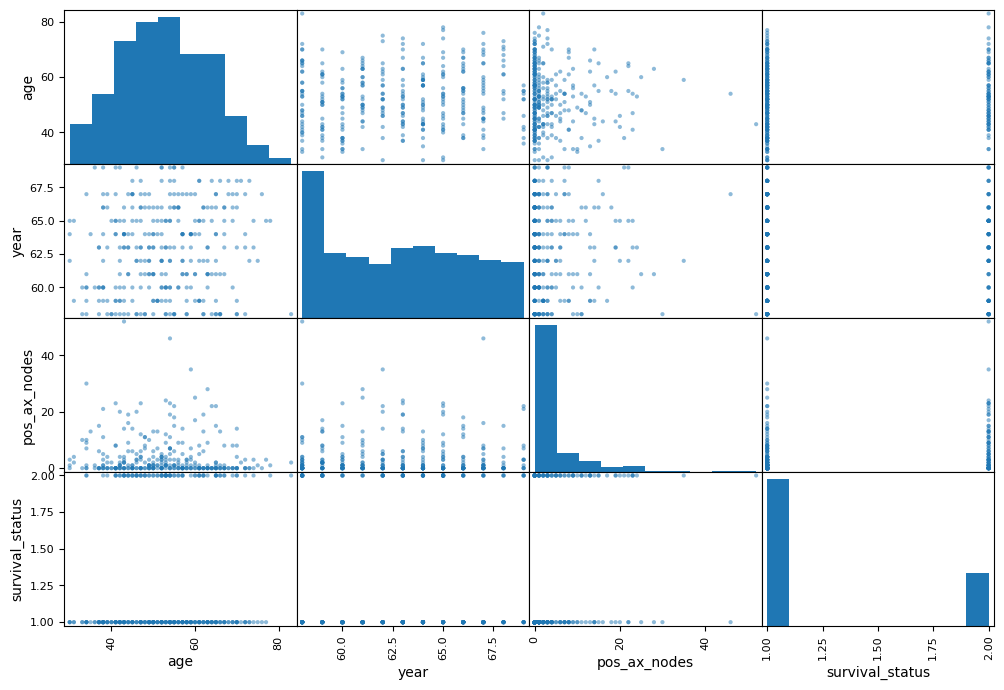

In [12]:
from pandas.plotting import scatter_matrix
attributes=['age', 'year', 'pos_ax_nodes', 'survival_status']
scatter_matrix(df[attributes], figsize=(12,8))

The scatter matrix doesn't seem to provide more information, the data points looks disconnected.

### **4. Prepare the data for machine learning algorithms**
- Checking the null values and separate predictors and labels

In [13]:
training.isna().sum()

age                2
year               1
pos_ax_nodes       1
survival_status    0
dtype: int64

from the training data, it can be clearly seen that there are 2 missing values in age variable, 1 missing value in year column, and 1 missing value in pos_ax_nodes, whereas the target variable doesnt have any missing values luckily.

- Seperate predictors and labels

In [14]:
training_num = train_set.drop("survival_status", axis=1)
training_labels=train_set['survival_status'].copy()



#### *4.1 Data Cleaning*

As we know that the data has some missing values, we have to deal with it


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(training_num)
imputer.statistics_
X= imputer.transform(training_num)
training_tr = pd.DataFrame(X, columns = training_num.columns, index = training_num.index)
training_tr.isna().sum()

age             0
year            0
pos_ax_nodes    0
dtype: int64

We use imputer to take care of missing values. In this case, we replaced the missing values with the median of other rows in the column. After that, we check the null values again from training data after transforming the missing values to the median. The output gave us no null value, which means the new training data is like already clean

In [16]:
training_labels = training_labels.map(lambda x:1 if x == 1 else 0)
training_labels.value_counts()

survival_status
1    178
0     66
Name: count, dtype: int64

We change the training labels to 0 and 1 to easy to to work with, where:
+ 1 : the patient survived 5 years or longer (178 patients)
+ 0 : the patient died within 5 years (66 patients)

#### *Transformation Pipelines*

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='median')),
('std_scaler', StandardScaler()),
])

We create a small  pipleline for numerical attributes where we replace the missing values with the median and rescale the numerical features

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
num_attribs=list(training_num)
cat_attribs=["survival_status"]
full_pipeline=ColumnTransformer([
 ("num", num_pipeline, num_attribs)
])
training_prepared = full_pipeline.fit_transform(training)

Next, we use a single transformer to handle all columns, which will be used to clean other data with the same way


### **5. Select and train a model**
#### *5.1. Training and evaluation on the training set*

- Train a logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logisticRegr = LogisticRegression()
logisticRegr.fit(training_prepared, training_labels)

LogisticRegression()

Use linear model to predict some values

In [20]:
some_data = training.iloc[:5]
some_labels = training['survival_status'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:', logisticRegr.predict(some_data_prepared))
print('Labels:', list(some_labels))

predictions: [1 0 1 1 1]
Labels: [1, 1, 2, 1, 1]


The predictions predict correctly for all the first 5 instances
the output displays the predictions with 5 individuals survived more than 5 years and the true labels also showing all 5 individual survived more than 5 years

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
logistic_predictions = logisticRegr.predict(training_prepared)
print('Accuracy on training:', accuracy_score(training_labels, logistic_predictions))
print('Recall on training:', recall_score(training_labels, logistic_predictions))



Accuracy on training: 0.7540983606557377
Recall on training: 0.9606741573033708


- Accuracy on training is 75.4% which means that the model accurately predicted the survival status with 75.8%. the slightly lower overall accuracy is likely due to some false positive (predicting tthat someone survived more than 5 years but they actually couldn't) means while lower True Positive or True Negative
- Recall on training is 96.1% indicating that the model is highly effective at identifying actually survivors. Recall is calculate as TP/(TP + FN) => so the high recall suggests that the model is sensitive to detecting survivors more than 5 years, resulting in fewer false negatives (incorrectly predicting who survived by 5 years when they can last more than 5 years)


- Train a SVM model

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(training_prepared, training_labels)
svm_predictions = svm_model.predict(training_prepared)
print('Accuracy on training:', accuracy_score(training_labels, svm_predictions))
print('Recall on training:', recall_score(training_labels, svm_predictions))


Accuracy on training: 0.7868852459016393
Recall on training: 0.9662921348314607


- Accuracy on training is 78.7% which means that the model accurately predicted the survival status with 78.28% which is slightly higher than logistic regression model with 75.8%. the gently higher overall accuracy is likely due to little increasing some false positive (predicting tthat someone survived more than 5 years but they actually couldn't)
- Recall on training is 96.6% the model is quite well and it is gently higher than logistic regression model with 96.1% indicating that the model is good at recognizing real survivors.
according to calculate recall = TP/(TP + FN)
=> so the high recall suggests that the model is sensitive to detecting survivors more than 5 years, resulting in fewer false negatives (incorrectly predicting who survived by 5 years when they can last more than 5 years)


- Train a KNN model

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# Find the best k for knn model
k_values = range(1, 30)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, training_prepared, training_labels, cv=5, scoring='accuracy')
    scores.append(score.mean())
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(training_prepared, training_labels)
knn_predictions = knn_model.predict(training_prepared)
print('Accuracy on training:', accuracy_score(training_labels, knn_predictions))
print('Recall on training:', recall_score(training_labels, knn_predictions))


Accuracy on training: 0.7704918032786885
Recall on training: 0.9269662921348315


The KNN model has around 77% accuracy and 92.7% recall. It has the second highest accuracy but lowest recall on training set
=> SVM has the best performance on traning set



### **6. Fine-Tune your model**
First, we have to use the pipeline we already prepared in step 4 to transform the test set and also change the target variable to 1 and 0

In [24]:
X_test = test_set.drop("survival_status", axis=1)
y_test = test_set['survival_status'].copy()
X_test_prepared = full_pipeline.transform(X_test)
y_test_prepared = y_test.map(lambda x:1 if x == 1 else 0)


Before evaluating the model, the 2 methods that we  used are accuracy and recall. Accuracy helps us see the overall correctness of the models' predictions. Meanwhile, recall is the most crucial method because it ensures that the model captures most high-risk patients (those who might not survive), we want to minimize the number of high-risk patients who are missed, as they might need further monitoring or treatment. High recall ensures that most patients at risk of not surviving are correctly flagged.

In [28]:
# Logistic Model
logistic_final_pred = logisticRegr.predict(X_test_prepared)
print('Accuracy on test set:', accuracy_score(y_test_prepared, logistic_final_pred))
print('Recall on test:', recall_score(y_test_prepared, logistic_final_pred))

Accuracy on test set: 0.7580645161290323
Recall on test: 0.9361702127659575


Logistic model by test set correctly predicted the survival status 75.8%
- although the recall is fairly high, the accuracy is just average. If you want to make sure that as many patients can survivor by 5 years (0) or more than 5 years (1).
- high recall is frequently more useful than high accuracy in situations such as medical survival forecasts since it's more important to survivors (reduce false negative = missing some patients who survived more than 5 years).

In [29]:
# SVM model
svm_final_pred = svm_model.predict(X_test_prepared)
print('Accuracy on test set:', accuracy_score(y_test_prepared, svm_final_pred))
print('Recall on test:', recall_score(y_test_prepared, svm_final_pred))

Accuracy on test set: 0.7580645161290323
Recall on test: 0.9574468085106383


In [30]:
# KNN model
knn_final_pred = knn_model.predict(X_test_prepared)
print('Accuracy on test set:', accuracy_score(y_test_prepared, knn_final_pred))
print('Recall on test:', recall_score(y_test_prepared, svm_final_pred))

Accuracy on test set: 0.7419354838709677
Recall on test: 0.9574468085106383


*SVM Model and KNN Model on testing data*
- SVM model: SVM has the same accuracy as Logistic model, and the same recall with the KNN model, which are 75.8% and 95.7%. This means although the accuracy is average, it is better to have higher recall in this medical scenario as to reduce false negative.
- KNN model: KNN has the lowest accuracy on the test set with 74.2% and same recall with SVM: 0.957. The SVM and KNN models are more successful identifying survivors than the logistic regression model which has a higher recall (95.7%) than former (93.6%).

=> SVM performs the best among 3 models on test set

### **7. Comparison - Present Solution**
- Training performance: SVM model performs the best in both methods, 2nd is logistic, and last is KNN model
- Testing performance: SVM continues to perform the best in both methods, then recall, and lastly is logistic.
All of the models are quite good in training data but performs a bit worse on testing set, which means it might be over-fitting, but just a bit. SVM model performs very well on the training and doing the best on the test performance with smallest difference. As the test set can be considered future data, so if the model performs better on it on the test set, it is better to choose it. Moreover, as we already said in this scenario, recall is the most important method, and Logistic model has the highest recall in all sets.

=> After all, **SVM Model** model is the best choice among the 3 models
